In [5]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# import data
chess = pd.read_csv('chess.csv')

In [7]:
# analysze data 
chess.head()

,time_control,end_time,rated,time_class,rules,gm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
0,300+1,2021-06-19 11:40:40,True,blitz,chess,123lt,vaishali2001,2658,win,123lt,2601,resigned
1,300+1,2021-06-19 11:50:06,True,blitz,chess,123lt,123lt,2627,win,vaishali2001,2649,resigned
2,300+1,2021-06-19 12:01:17,True,blitz,chess,123lt,vaishali2001,2641,timeout,123lt,2649,win
3,300+1,2021-06-19 12:13:05,True,blitz,chess,123lt,123lt,2629,timeout,vaishali2001,2649,win
4,300+1,2021-06-19 12:28:54,True,blitz,chess,123lt,vaishali2001,2657,win,123lt,2611,resigned



## Dataset Description
The data contains information about all the games played by GM titled players on Chess.com in 2021.

We have information about:
- The time format
- Game is rated
- Rules adopted
- Usernames of both players
- Ratings for both players
- Result

Let's analyze each feature:



In [8]:
# time format
chess.value_counts('time_class')

time_class
blitz     599394
bullet    238246
rapid      18462
daily       3268
dtype: int64

In [17]:
def make_pie_chart(df: pd.DataFrame, column: str, visual_params=None):
    '''
    df -----------------> dataset containing the data
    column -------------> a column from df containing the data for the plot
    visual_params ------> a list with:
                          the explode parameter
                          pctdistance
                          labeldistance
    '''
    if visual_params is None:
        percentages = list(df.value_counts(column) / sum(df.value_counts(column)) * 100)
        percentages = ['{:.2f}%'.format(x) for x in percentages]

        plt.pie(df.value_counts(column),
                labels = df[column].unique(),
                autopct='%.2f%%',
                explode=[.2 for x in df[column].unique()],
                pctdistance=1.3,
                labeldistance=1.5
        )

        plt.show()
    else:
        assert len(visual_params) == 3, f'Incorrect number of parameters! {len(visual_params)} have been passed instead of 3'
        percentages = list(df.value_counts(column) / sum(df.value_counts(column)) * 100)
        percentages = ['{:.2f}%'.format(x) for x in percentages]

        plt.pie(df.value_counts(column),
                labels = df[column].unique(),
                autopct='%.2f%%',
                explode=[visual_params[0] for x in df[column].unique()],
                pctdistance=visual_params[1],
                labeldistance=visual_params[2]
        )

        plt.show()

def make_histogram(data: list, bins: int = 10, freq: bool = True):
    plt.hist(data, bins=bins, density=freq)
    plt.show()

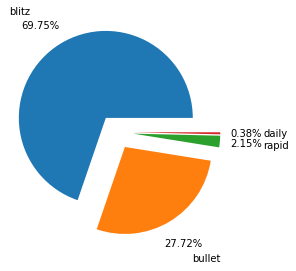

In [10]:
make_pie_chart(chess, 'time_class')

Blitz (300s + 1s per move) is the most played format (69.75%) with a total amount of 599394 games played

In [11]:
# game is rated
chess.value_counts('rated')

rated
True     813569
False     45801
dtype: int64

In [12]:
rated_percentage = {is_rated: chess.loc[chess.rated==is_rated].shape[0] / chess.shape[0] * 100 for is_rated in chess.rated.unique()}
rated_percentage

{True: 94.67039808231613, False: 5.329601917683885}

~94.5% of the games were rated

In [13]:
# rules adopted
chess.value_counts('rules')

rules
chess            824464
bughouse          28203
chess960           4962
oddschess           672
crazyhouse          554
threecheck          391
kingofthehill       124
dtype: int64

In [14]:
rules_percentage = {rule: chess.loc[chess.rules==rule].shape[0] / chess.shape[0] * 100 for rule in chess.rules.unique()}
rules_percentage

{'chess': 95.93818727672597,
 'bughouse': 3.2818227306049783,
 'chess960': 0.5773997230529342,
 'oddschess': 0.07819681859967186,
 'threecheck': 0.04549844653641621,
 'kingofthehill': 0.014429174860653735,
 'crazyhouse': 0.06446582961937233}

The majority of the games (~96%) were played under the regular chess rules

In [15]:
# ratings
players = {}
for _, row in chess.iterrows():
    player1 = row['white_username']
    player1_rat = row['white_rating']
    player2 = row['black_username']
    player2_rat = row['black_rating']
    if player1 not in players:
        players[player1] = player1_rat
    if player2 not in players:
        players[player2] = player2_rat

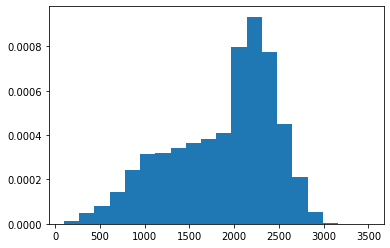

In [18]:
# let's have a look at the distribution of ratings
scores = [x for x in players.values()]
make_histogram(scores, 20, True)

In [26]:
avg_rating = sum(scores) / len(scores)
var_rating = sum([(x - avg_rating)**2 for x in scores]) / len(scores)

In [37]:
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        return (data[len(data)/2]+data[len(data)/2-1])/2
    return data[int(len(data)/2)]

In [38]:
print('Average rating = {:.2f}\nStandard deviation = {:.2f}\nMax = {:.2f}\nMin = {:.2f}\nMedian = {:.2f}'.format(avg_rating, var_rating**.5, max(scores), min(scores), median(scores)))

Average rating = 1871.15
Standard deviation = 585.75
Max = 3500.00
Min = 100.00
Median = 2041.00


We have a right tailed distribution with mean 1871.15 and standard deviation 585.75. By comparing the minimun, maximum and median value we can say that the first half of ratings cover a much wider range going from 100 to 2041 while the second half peaks at 3500 